In [2]:
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

x,y = datasets.load_diabetes(return_X_y=True)
raw = x[:, None, 2]

In [3]:
raw

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

# Min Max Scaling

In [5]:
max_raw = max(raw)
min_raw = min(raw)
scaled = (2*raw - max_raw - min_raw)/(max_raw - min_raw)

In [6]:
scaled

array([[ 1.65289256e-01],
       [-7.02479339e-01],
       [ 3.30578512e-02],
       [-3.96694215e-01],
       [-5.86776860e-01],
       [-6.19834711e-01],
       [-6.69421488e-01],
       [-3.22314050e-01],
       [ 1.65289256e-01],
       [-8.26446281e-03],
       [-9.50413223e-01],
       [-1.73553719e-01],
       [-5.28925620e-01],
       [-3.22314050e-01],
       [-5.04132231e-01],
       [-4.46280992e-01],
       [ 1.65289256e-02],
       [-2.14876033e-01],
       [-3.88429752e-01],
       [-4.46280992e-01],
       [-7.43801653e-01],
       [-4.79338843e-01],
       [-3.38842975e-01],
       [ 1.57024793e-01],
       [-3.30578512e-02],
       [-4.04958678e-01],
       [-9.00826446e-01],
       [ 1.48760331e-01],
       [-4.71074380e-01],
       [-3.55371901e-01],
       [ 3.30578512e-02],
       [-8.09917355e-01],
       [ 6.52892562e-01],
       [-6.94214876e-01],
       [-7.93388430e-01],
       [-5.45454545e-01],
       [-1.32231405e-01],
       [-2.23140496e-01],
       [ 2.3

(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

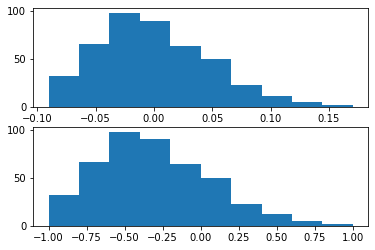

In [45]:
fig, axs = plt.subplots(2, 1)
axs[0].hist(raw)
axs[1].hist(scaled)

Modelo de entrenamiento

In [46]:
def train_raw():
    linear_model.LinearRegression().fit(raw, y)
    
def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)
    

In [27]:
raw_time = timeit.timeit(train_raw, number=100)
raw_time

0.032444869000073595

In [30]:
scaled_time = timeit.timeit(train_scaled, number=100)
scaled_time

0.029168557000048168

In [33]:
percent = (raw_time - scaled_time)/raw_time * 100
percent

10.098089778134089

10% improved

# Z Score scale

In [39]:
mean = np.mean(raw)
mean

-8.013951493363262e-16

In [41]:
std = np.std(raw)
std

0.047565149415453895

In [43]:
z_score_scaled = (raw - mean)/std
z_score_scaled

array([[ 1.29708846],
       [-1.08218016],
       [ 0.93453324],
       [-0.24377122],
       [-0.76494435],
       [-0.85558315],
       [-0.99154136],
       [-0.03983391],
       [ 1.29708846],
       [ 0.82123474],
       [-1.7619712 ],
       [ 0.36804071],
       [-0.60632644],
       [-0.03983391],
       [-0.53834734],
       [-0.37972943],
       [ 0.88921384],
       [ 0.25474221],
       [-0.22111152],
       [-0.37972943],
       [-1.19547867],
       [-0.47036823],
       [-0.08515331],
       [ 1.27442876],
       [ 0.75325563],
       [-0.26643092],
       [-1.62601299],
       [ 1.25176906],
       [-0.44770853],
       [-0.13047271],
       [ 0.93453324],
       [-1.37675628],
       [ 2.63401083],
       [-1.05952046],
       [-1.33143688],
       [-0.65164584],
       [ 0.48133922],
       [ 0.23208251],
       [ 1.50102577],
       [ 0.30006161],
       [-0.17579212],
       [-1.42207568],
       [-0.22111152],
       [-0.49302793],
       [ 1.43304667],
       [-0

(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([-1.89792941, -1.34956464, -0.80119987, -0.2528351 ,  0.29552967,
         0.84389444,  1.39225921,  1.94062398,  2.48898875,  3.03735352,
         3.58571828]),
 <BarContainer object of 10 artists>)

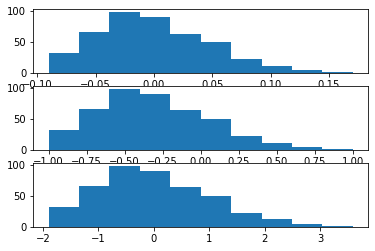

In [44]:
fig, axs = plt.subplots(3, 1)
axs[0].hist(raw)
axs[1].hist(scaled)
axs[2].hist(z_score_scaled)

In [48]:
def train_zscore():
    linear_model.LinearRegression().fit(z_score_scaled, y)

In [49]:
z_scaled_time = timeit.timeit(train_zscore, number=100)
z_scaled_time

0.029844547000266175

In [50]:
percent = (raw_time - z_scaled_time)/raw_time * 100
percent

8.014586219477483

8% improved

# Transformaciones Lineales

In [51]:
df = pd.read_csv('cars.csv')

<AxesSubplot:>

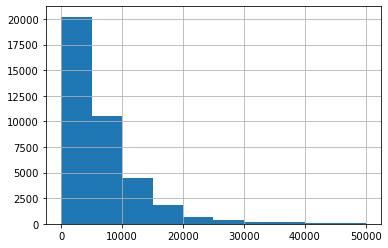

In [54]:
df['price_usd'].hist()

Transformacion con tangente hiperbolica

<AxesSubplot:>

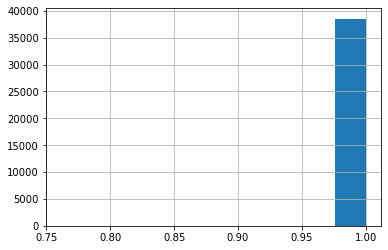

In [55]:
a = 1
df['price_usd'].apply(lambda x: np.tanh(x/a)).hist()

<AxesSubplot:>

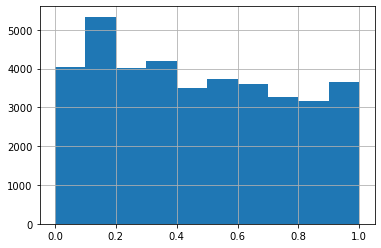

In [56]:
a = 10000
df['price_usd'].apply(lambda x: np.tanh(x/a)).hist()